In [112]:
from requests import get
import numpy as np

def get_numeric_heatmap(level=0, min_lon=0, max_lon=9, min_lat=0, max_lat=9):
    min_lat, max_lat = 90 - max_lat, 90 - min_lat

    level, min_lon, max_lon, min_lat, max_lat = map(str,(level, min_lon, max_lon, min_lat, max_lat))
    
    url_head = 'http://144.206.233.183/thredds/dodsC/Data/s362d.nc.ascii?data'
    url_tail_1 = '[' + level + ':1:' + level + ']'
    url_tail_2 = '[' + min_lon + ':1:' + max_lon + ']'
    url_tail_3 = '[' + min_lat + ':1:' + max_lat + ']'
    url = url_head + url_tail_1 + url_tail_2 + url_tail_3
    
    r = get(url)
    tmp = r.text
    str_matrix = []
    
    for string in tmp.split('\n'):
        if len(string) > 0 and string[0] == '[':
            str_matrix.append(string.split(', ')[1:])

    matrix = list(map(lambda x: list(map(float, x)), str_matrix))
    matrix = np.array(matrix).T
    matrix = np.flip(matrix)
    
    return matrix, int(min_lon), int(max_lon), int(min_lat), int(max_lat)

In [115]:
lat = {
    "min_val": -90, # from -90 degrees
    "max_val": 90   # to 90 degrees
}
lon = {
    "min_val": 0,   # from 0 degrees
    "max_val": 360  # to 360 degrees
}

matrix, min_lon, max_lon, min_lat, max_lat = get_numeric_heatmap(min_lat=lat["min_val"], 
                                                                 max_lat=lat["max_val"], 
                                                                 min_lon=lon["min_val"],
                                                                 max_lon=lon["max_val"])

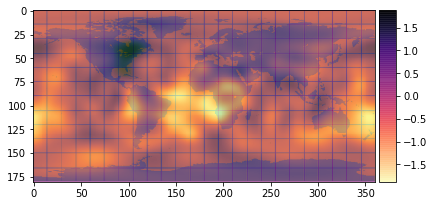

In [117]:
from seaborn import heatmap
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.pyplot import Figure
from skimage.io import imshow
from skimage.io import imread
from skimage.transform import resize

frame = imread("ok_map.png")
frame = resize(frame,(181,361))
frame_part = frame[min_lat:max_lat, min_lon:max_lon] 
plt.imshow(frame_part)
imshow(matrix, alpha=0.7, cmap='magma_r')
plt.savefig('result.png')